## Examen Final - Simulación Computacional 2020-I
Noviembre 04 de 2020 - Fecha y hora de entrega: Noviembre 05 de 2020 12:00 m (mediodía)

**Candido Stiven Moreno Serrato - 160003749**

## **Librerias a usar con algunos metodos**

In [1]:
!pip install simpy

In [3]:
import numpy as np
import pandas as pd
import time
from datetime import datetime
import random
import matplotlib.pyplot as plt
import math
from scipy import stats

def genran(a,b,m,xant):
    xsig = (a*xant + b) % m
    usig = xsig / m
    return [xsig,usig]

def genranN(a,b,m,x0,N):
    xant = x0
    I=[]
    X=[]
    U=[]
    for t in range(1, N+1):
        [xi,ui] = genran(a,b,m,xant)
        I.append(t)
        X.append(xi)
        U.append(ui)
        xant = xi
    return [I,X,U]

def showValues(I,U):
    print("i\tUi")
    for t in range(0, len(U)):
        print("%d\t%2.4f" % (I[t],U[t]), sep=' ', end='\n')

def tamanoCiclo(values):
    tam = 1
    max_len = int(len(values) / 2)
    for ii in range(2, max_len):
        if (values[0:ii] == values[ii:2*ii]).any() :
            return ii
    return tam


def genvardiscret(U,X,P):
    V = []
    for t in range(0, len(U)):
        for t2 in range(0, len(X)):
            if U[t]<P[t2]:
                V.append(X[t2])
                break
    return V

def genpoisson(U,L):
    i=0
    px=np.exp(-L)
    Fx=px

    while True:
      if U < Fx:
        Xi = i
        return Xi
        break
      px = (L*px)/(i+1)
      Fx = Fx + px
      i = i + 1

def genpoissonN(Ui,L,N):
  X=[]
  for i in range(0,len(Ui)):
      xi = genpoisson(Ui[i],L)
      X.append(xi)
  return X

def genbinomial(U,n,p):
  c=p/(1-p)
  i=0
  px=np.power(1-p,n)
  Fx=px

  while True:
    if U < Fx:
      Xi = i
      return Xi
      break
    px=(c*(n-i)/(i+1))*px 
    Fx = Fx + px
    i = i + 1

def genbinomialN(Ui,n,p,N):
  X=[]
  for i in range(0,len(Ui)):
      xi = genbinomial(Ui[i],n,p)
      X.append(xi)
  return X

def CycleSize(P):
  flag = True
  print(P)
  acum=0
  const=P[1]-P[0]
  for t in range(1, len(P)):
    acum=acum+(P[t]-P[t-1])
    if const != (P[t]-P[t-1]):
      flag = False
      break
  #La verdad para mí sólo es hacer una resta estilo P[1] - P[0] mientras haya ciclo, pero en caso de que no existe es el for
  average = acum/(len(P)-1)
  if flag == True:
    print('El tamaño del ciclo es: ')
    print(average)
  else:
    print('No es posible encontrar un ciclo \n')

## 1.  (1.0 punto)
Para los siguientes generadores congruenciales mixtos encuentre $u_1,...,u_{100}$, e indique el tamaño del ciclo (si lo tiene).

**a)** $x_0=93, x_n = (14x_{n-1}+9) \mod 127$

**b)** $x_0=3, x_n = (5x_{n-1}+7) \mod 200$

**c)** $x_0=123, x_n = (13x_{n-1}+3) \mod 16$

**d)** $x_0=7, x_n = (5x_{n-1}+3) \mod 33$

**e)** $x_0=1733, x_n = (7x_{n-1}) \mod 144$


### Punto a)

---



In [77]:

N = 100

a = 14.0
b = 9.0
m = 127.0
x0 = 93.0

[I,X,U] = genranN(a,b,m,x0,N)
#showValues(I,U)
print("U: ", U)
TamanoCiclo = tamanoCiclo((np.array(X)).astype(int))

#cuando el ciclo es 1, significa que no se encontró un ciclo
if TamanoCiclo !=1:
  print("El tamaño del ciclo es: "+str(TamanoCiclo))
else:
  print("No se encuentra ciclo")

U:  [0.3228346456692913, 0.5905511811023622, 0.33858267716535434, 0.8110236220472441, 0.4251968503937008, 0.023622047244094488, 0.4015748031496063, 0.6929133858267716, 0.7716535433070866, 0.8740157480314961, 0.30708661417322836, 0.3700787401574803, 0.25196850393700787, 0.5984251968503937, 0.44881889763779526, 0.3543307086614173, 0.031496062992125984, 0.5118110236220472, 0.23622047244094488, 0.3779527559055118, 0.36220472440944884, 0.14173228346456693, 0.05511811023622047, 0.84251968503937, 0.8661417322834646, 0.1968503937007874, 0.8267716535433071, 0.6456692913385826, 0.11023622047244094, 0.6141732283464567, 0.6692913385826772, 0.4409448818897638, 0.2440944881889764, 0.4881889763779528, 0.905511811023622, 0.7480314960629921, 0.5433070866141733, 0.6771653543307087, 0.5511811023622047, 0.7874015748031497, 0.09448818897637795, 0.3937007874015748, 0.5826771653543307, 0.2283464566929134, 0.2677165354330709, 0.8188976377952756, 0.5354330708661418, 0.5669291338582677, 0.007874015748031496, 0.

### Punto b)

---

In [76]:

N = 100

a = 5.0
b = 7.0
m = 200.0
x0 = 3.0

[I,X,U] = genranN(a,b,m,x0,N)
#showValues(I,U)
print("U: ", U)
TamanoCiclo = tamanoCiclo((np.array(X)).astype(int))

#cuando el ciclo es 1, significa que no se encontró un ciclo
if TamanoCiclo !=1:
  print("El tamaño del ciclo es: "+str(TamanoCiclo))
else:
  print("No se encuentra ciclo")

U:  [0.11, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835, 0.21, 0.085, 0.46, 0.335, 0.71, 0.585, 0.96, 0.835]
El tamaño del ciclo es: 8


### Punto c)

---

In [78]:

N = 100

a = 13.0
b = 3.0
m = 16.0
x0 = 123.0

[I,X,U] = genranN(a,b,m,x0,N)
#showValues(I,U)
print("U: ", U)
TamanoCiclo = tamanoCiclo((np.array(X)).astype(int))

#cuando el ciclo es 1, significa que no se encontró un ciclo
if TamanoCiclo !=1:
  print("El tamaño del ciclo es: "+str(TamanoCiclo))
else:
  print("No se encuentra ciclo")

U:  [0.125, 0.8125, 0.75, 0.9375, 0.375, 0.0625, 0.0, 0.1875, 0.625, 0.3125, 0.25, 0.4375, 0.875, 0.5625, 0.5, 0.6875, 0.125, 0.8125, 0.75, 0.9375, 0.375, 0.0625, 0.0, 0.1875, 0.625, 0.3125, 0.25, 0.4375, 0.875, 0.5625, 0.5, 0.6875, 0.125, 0.8125, 0.75, 0.9375, 0.375, 0.0625, 0.0, 0.1875, 0.625, 0.3125, 0.25, 0.4375, 0.875, 0.5625, 0.5, 0.6875, 0.125, 0.8125, 0.75, 0.9375, 0.375, 0.0625, 0.0, 0.1875, 0.625, 0.3125, 0.25, 0.4375, 0.875, 0.5625, 0.5, 0.6875, 0.125, 0.8125, 0.75, 0.9375, 0.375, 0.0625, 0.0, 0.1875, 0.625, 0.3125, 0.25, 0.4375, 0.875, 0.5625, 0.5, 0.6875, 0.125, 0.8125, 0.75, 0.9375, 0.375, 0.0625, 0.0, 0.1875, 0.625, 0.3125, 0.25, 0.4375, 0.875, 0.5625, 0.5, 0.6875, 0.125, 0.8125, 0.75, 0.9375]
El tamaño del ciclo es: 16


### Punto d)

---

In [79]:

N = 100

a = 5.0
b = 3.0
m = 33.0
x0 = 7.0

[I,X,U] = genranN(a,b,m,x0,N)
#showValues(I,U)
print("U: ", U)
TamanoCiclo = tamanoCiclo((np.array(X)).astype(int))

#cuando el ciclo es 1, significa que no se encontró un ciclo
if TamanoCiclo !=1:
  print("El tamaño del ciclo es: "+str(TamanoCiclo))
else:
  print("No se encuentra ciclo")

U:  [0.15151515151515152, 0.8484848484848485, 0.3333333333333333, 0.7575757575757576, 0.8787878787878788, 0.48484848484848486, 0.5151515151515151, 0.6666666666666666, 0.42424242424242425, 0.21212121212121213, 0.15151515151515152, 0.8484848484848485, 0.3333333333333333, 0.7575757575757576, 0.8787878787878788, 0.48484848484848486, 0.5151515151515151, 0.6666666666666666, 0.42424242424242425, 0.21212121212121213, 0.15151515151515152, 0.8484848484848485, 0.3333333333333333, 0.7575757575757576, 0.8787878787878788, 0.48484848484848486, 0.5151515151515151, 0.6666666666666666, 0.42424242424242425, 0.21212121212121213, 0.15151515151515152, 0.8484848484848485, 0.3333333333333333, 0.7575757575757576, 0.8787878787878788, 0.48484848484848486, 0.5151515151515151, 0.6666666666666666, 0.42424242424242425, 0.21212121212121213, 0.15151515151515152, 0.8484848484848485, 0.3333333333333333, 0.7575757575757576, 0.8787878787878788, 0.48484848484848486, 0.5151515151515151, 0.6666666666666666, 0.424242424242424

### Punto e)

---

In [89]:

N = 100

a = 7.0
b = 0.0
m = 144.0
x0 = 1733.0

[I,X,U] = genranN(a,b,m,x0,N)
#showValues(I,U)
print("U: ", U)
TamanoCiclo = tamanoCiclo((np.array(X)).astype(int))

#cuando el ciclo es 1, significa que no se encontró un ciclo
if TamanoCiclo !=1:
  print("El tamaño del ciclo es: "+str(TamanoCiclo))
else:
  print("No se encuentra ciclo")

U:  [0.24305555555555555, 0.7013888888888888, 0.9097222222222222, 0.3680555555555556, 0.5763888888888888, 0.034722222222222224, 0.24305555555555555, 0.7013888888888888, 0.9097222222222222, 0.3680555555555556, 0.5763888888888888, 0.034722222222222224, 0.24305555555555555, 0.7013888888888888, 0.9097222222222222, 0.3680555555555556, 0.5763888888888888, 0.034722222222222224, 0.24305555555555555, 0.7013888888888888, 0.9097222222222222, 0.3680555555555556, 0.5763888888888888, 0.034722222222222224, 0.24305555555555555, 0.7013888888888888, 0.9097222222222222, 0.3680555555555556, 0.5763888888888888, 0.034722222222222224, 0.24305555555555555, 0.7013888888888888, 0.9097222222222222, 0.3680555555555556, 0.5763888888888888, 0.034722222222222224, 0.24305555555555555, 0.7013888888888888, 0.9097222222222222, 0.3680555555555556, 0.5763888888888888, 0.034722222222222224, 0.24305555555555555, 0.7013888888888888, 0.9097222222222222, 0.3680555555555556, 0.5763888888888888, 0.034722222222222224, 0.243055555

## 2. (1.0 punto)
Dados los siguientes valores de la distribución de probabilidad discreta de la variable aleatoria $X$ de un dado de 13 lados: $X = {1,2,3,4,5,6,7,8,9,10,11,12,13}$, $p(X) = {0.03, 0.1, 0.05, 0.23, 0.15, 0.1, 0.1, 0.05, 0.05, 0.05, 0.03, 0.03, 0.03}$, ¿Cuáles serían los primeros 100 valores aleatorios usando el método de la transformada inversa usando el siguiente generador congruencial?: 

$$x_n = (1664525x_{n-1}+1013904223) \mod 2^{32}$$ 

Con una semilla $x_0=2020$

In [82]:

N = 100

a = 1664525.0
b = 1013904223.0
m = (2**32)

x0 = 2020

[I,X,U] = genranN(a,b,m,x0,N)

X = [1,2,3,4,5,6,7,8,9,10,11,12,13]
p = [0.03,0.1,0.05,0.23,0.15,0.1,0.1,0.05,0.05,0.05,0.03,0.03, 0.03]
P = np.cumsum(p) 

valoresGenerados = genvardiscret(U,X,P)
print("Rta=", valoresGenerados)



Rta= [1, 5, 11, 5, 6, 13, 2, 4, 2, 6, 4, 2, 10, 5, 4, 1, 2, 1, 5, 12, 5, 5, 4, 2, 3, 7, 6, 2, 4, 2, 4, 4, 4, 4, 7, 6, 10, 6, 9, 5, 10, 3, 12, 2, 1, 4, 1, 3, 13, 8, 6, 1, 8, 4, 4, 2, 2, 9, 3, 7, 2, 5, 4, 4, 3, 11, 4, 2, 6, 3, 7, 4, 2, 4, 2, 5, 7, 9, 11, 5, 4, 2, 5, 11, 4, 10, 4, 7, 7, 1, 10, 10, 2, 5, 4, 11, 5, 2, 5, 7]


## 3. (1.0 punto)
Se tiene un sistema de línea de espera con un servidor y capacidad infinita (Modelo de Colas G/G/1) (Ver [Presentación](https://drive.google.com/file/d/1P-PQwzcgeVSfHFF8_8AdVkYuISFmhOtz/view?usp=sharing) ), en el cual tanto los tiempos de llegada entre clientes, así como los tiempos de atención del servidor se comportan como  variables aleatorias generadas de distribuciones de probabilidad exponenciales, en donde en promedio llegan A clientes por minuto al sistema y el servidor atiende en promedio B clientes por minuto. La simulación inicia en el tiempo $t=0$ y se deja de permitir el ingreso de mas clientes en el sistema en el tiempo $T=100$.

Para analizar el sistema Ud. debe usar la implementación de acuerdo con el Modelo de Colas G/G/1 visto en clase (diapositivas 42 y 43 [Presentación](https://drive.google.com/file/d/1P-PQwzcgeVSfHFF8_8AdVkYuISFmhOtz/view?usp=sharing) ). 

Para la generación de las variables aleatorias con distribución exponencial debe usar el método de la inversión para variables aleatorias continuas usando generadores congruenciales mixtos. _Ayuda: El método de inversión para variables aleatorias continuas debe usar la función inversa $F^{-1}(p)$ de la distribución de probabilidad acumulada de la distribución exponencial en donde el valor $p$ proviene del generador congruencial mixto_.

Para la generación de las variables aleatorias de los tiempos entre las llegadas de clientes (variable aleatoria $X$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = A$ a partir de un generador congruencial _Borland C/C++_ (i.e. $a = 22695477$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 987654321$.

Para la generación de las variables aleatorias de los tiempos de atención del servidor (variable aleatoria $Y$) debe generar variables aleatorias continuas de una distribución exponencial con $\lambda = B$ a partir de un generador congruencial Turbo Pascal (i.e. $a = 134775813$, $c = 1$, $m=2^{32}$) y semilla $X_0 = 123456789$.

Con su implementación para $A=3$ y $B=7$ por favor responda lo siguiente:

**a)** Tiempo promedio de los clientes en el sistema.

**b)** Tiempo promedio de los clientes en la cola.

**c)** Tiempo transcurrido desde $T$ hasta que el último cliente abandona el sistema.

**d)** Número máximo de clientes en el sistema durante la simulación.

**e)** Total de clientes que pasaron por el sistema

**f)** Grafique el número de clientes en el sistema (eje Y) con respecto al tiempo (eje X).

In [87]:
Xant1 = 987654321
Xant2 = 123456789

M = 99999.0
T = 100.0
at = []
an = []
LLt = []
St = []


def gencongru1(): 
    global Xant1
    a = 22695477
    c = 1
    m = 2**32
    Xnext = (a * Xant1 + c) % m
    Xant1 = Xnext
    U = Xnext / m
    return U

def gencongru2():
    global Xant2
    a = 134775813
    c = 1
    m = 2**32
    Xnext = (a * Xant2 + c) % m
    Xant2 = Xnext
    U = Xnext / m
    return U

def GenerarX():
    A = 3
    U = gencongru1()
    X = -(math.log(1-U))/float(A)
    return X

def GenerarY():
  B = 7
  U = gencongru2()
  Y = -(math.log(1-U))/float(B)
  return Y

def Llegada(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t=tsuc
    n = n + 1
    LLt.append(t)
    at.append(t)
    an.append(n)
    
    NLL = NLL + 1
    LL.append(t)
    
    X = GenerarX()
    
    if (t+X) < T:
        TSuc['tLL'] = t + X
    if n==1:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        #Serv[NS]=Y 
        Serv.append(Y)
        
def Servidor(tsuc):
    global n, NLL, NS, t, S, Serv, LL, at, an
    t = tsuc
    n = n - 1
    
    St.append(t)
    at.append(t)
    an.append(n)
    
    NS = NS + 1
    S.append(t)

    if n>0:
        Y = GenerarY()
        TSuc['tS'] = t + Y
        Serv.append(Y) 

t = tsuc = NLL = NS = n = 0

at.append(t)
an.append(n)

TSuc = {"tLL":M, "tS":M}

LL = []
S = []
Serv = []
LL.append(0.0)
S.append(0.0)
Serv.append(0.0)

X = GenerarX()

if X > T:
    Tp = t_med_sistema = t_med_cola = 0.0
    exit
else:
    Llegada(X)
    while((TSuc['tLL'] != M)|(TSuc['tS']!=M)):
        if TSuc['tLL'] < TSuc['tS']:
            tsuc = TSuc['tLL']
            TSuc['tLL'] = M
            Llegada(tsuc)
            
        if TSuc['tS'] < TSuc['tLL']:
            tsuc = TSuc['tS']
            TSuc['tS'] = M
            Servidor(tsuc)

    Tp = max(0,t-T)
    acumulo1 = acumulo2 = 0.0
    ind = 0
    
    while ind < NLL:
        acumulo1 = acumulo1 + S[ind] - LL[ind]
        acumulo2 = acumulo2 + S[ind] - LL[ind] - Serv[ind]
        ind = ind + 1
    t_med_sistema = acumulo1/NLL
    t_med_cola = acumulo2/NLL

    exit

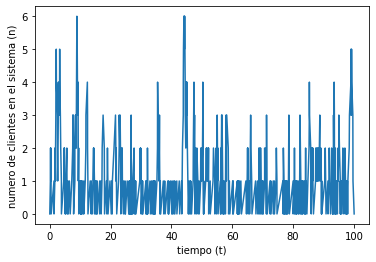

Tiempo medio de los clientes en el sistema:  0.24754565194087058
Tiempo medio de los clientes en la cola:  0.10303991052350314
Tiempo transcurrido desde T hasta que el último cliente abandona el sistema:  0.11217089676445369
Número máximo de clientes en el sistema:  6
Total de clientes que pasaron por el sistema:  318


In [88]:
at = np.array(at)
an = np.array(an)

plt.plot(at,an)
plt.xlabel('tiempo (t)')
plt.ylabel('numero de clientes en el sistema (n)')
plt.show()

print("Tiempo medio de los clientes en el sistema: ",t_med_sistema)
print("Tiempo medio de los clientes en la cola: ",t_med_cola)
print("Tiempo transcurrido desde T hasta que el último cliente abandona el sistema: ",Tp)
print("Número máximo de clientes en el sistema: ",max(an))
print("Total de clientes que pasaron por el sistema: ",NLL)

## 4. (1 punto)
Tomando en cuenta el ejemplo de asistentes a una conferencia que incluye  buffet como refrigerio con los parámetros y código presentado a continuación para 100 asistentes, resuelva:

**a)** Describa lo que sucede al ejecutar la simulación. ¿Qué inconveniente tiene la configuración actual?

**b)** Plantee y ejecute una configuración que al ejecutar la simulación garantice que todos los asistentes alcancen a llegar al buffet.

**c)** Para los dos escenarios calcule la suma total de conocimiento y hambre con el que terminaron los 100 asistentes al finalizar la simulación (_Nota: Ojo! no es acumulativo por asistente, es la suma entre todos los asistentes de las variables conocimiento y hambre al finalizar._).

In [43]:
from random import randint
import simpy 

In [ ]:
TALKS_PER_SESSION = 3
TALK_LENGTH = 20
BREAK_LENGTH = 30
DURATION_EAT = 2
BUFFET_SLOTS = 5

### punto A
---

Es posible detallar que la configuración actual genera más hambre que conocimiento en los asistentes, pero sobre todo, el inconveniente es que deja a mucho de los asistentes sin la posibilidad de ir al buffet de comidas.

### Punto B

La siguiente configuración aunque no es óptima, permite que todos los asistentes puedan llegar al buffet.

In [90]:

TALKS_PER_SESSION = 3
TALK_LENGTH = 20
BREAK_LENGTH = 35
DURATION_EAT = 1
BUFFET_SLOTS = 7


### Punto C

#### Escenario 1

In [100]:
TALKS_PER_SESSION = 3
TALK_LENGTH = 20
BREAK_LENGTH = 30
DURATION_EAT = 2
BUFFET_SLOTS = 5

Hambre = []
Conocimiento = []
cont = 0

def attendee(env, name, buffet, knowledge=0, hunger=0):
  while True:
    # Visit talks
    for i in range(TALKS_PER_SESSION):
      knowledge = knowledge + randint(0, 3) / (1 + hunger)
      hunger = hunger + randint(1, 4)
      yield env.timeout(TALK_LENGTH)
      
    global cont
    cont=cont+1
    print('%d El asistente %s terminó las charlas con un conocimiento %.2f y hambre '
    '%.2f.' % (cont, name, knowledge, hunger))

    #Al contar las personas, se podrá saber que a partir de 200, será el hambre de las personas al finalizar la tercera charla
    if cont>200:
      Hambre.append(hunger)
      Conocimiento.append(knowledge)

    # Go to buffet
    start = env.now
    with buffet.request() as req:
      yield req | env.timeout(BREAK_LENGTH - DURATION_EAT)
      time_left = BREAK_LENGTH - (env.now - start)
      
      if req.triggered:
        food = min(randint(3, 12), time_left) # Less time -> less food
        yield env.timeout(DURATION_EAT)
        hunger -= min(food, hunger)
        time_left -= DURATION_EAT
        print('El asistente %s terminó de comer con hambre %.2f' %
              (name, hunger))
      else:
        hunger += 1 # Penalty for only taking a look at all the food.
        print('El asistente %s no llegó al buffet :( , el hambre es ahora '
        'at %.2f.' % (name, hunger))
    yield env.timeout(time_left)

In [101]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(100):
  env.process(attendee(env, i, buffet))
env.run(until=270)


print("Hambre total de losasistentes al finalizar: ",np.sum(Hambre))
print("Conocimiento total de los asistentes al finalzar: ",np.sum(Conocimiento))

1 El asistente 0 terminó las charlas con un conocimiento 3.69 y hambre 10.00.
2 El asistente 1 terminó las charlas con un conocimiento 4.83 y hambre 7.00.
3 El asistente 2 terminó las charlas con un conocimiento 4.12 y hambre 8.00.
4 El asistente 3 terminó las charlas con un conocimiento 2.50 y hambre 6.00.
5 El asistente 4 terminó las charlas con un conocimiento 1.73 y hambre 6.00.
6 El asistente 5 terminó las charlas con un conocimiento 0.25 y hambre 8.00.
7 El asistente 6 terminó las charlas con un conocimiento 0.33 y hambre 5.00.
8 El asistente 7 terminó las charlas con un conocimiento 1.14 y hambre 8.00.
9 El asistente 8 terminó las charlas con un conocimiento 0.60 y hambre 10.00.
10 El asistente 9 terminó las charlas con un conocimiento 1.75 y hambre 5.00.
11 El asistente 10 terminó las charlas con un conocimiento 3.25 y hambre 8.00.
12 El asistente 11 terminó las charlas con un conocimiento 3.83 y hambre 6.00.
13 El asistente 12 terminó las charlas con un conocimiento 3.20 y ham

#### Escenario 2

In [102]:
TALKS_PER_SESSION = 3
TALK_LENGTH = 20
BREAK_LENGTH = 35
DURATION_EAT = 1
BUFFET_SLOTS = 7

Hambre = []
Conocimiento = []
cont = 0

def attendee(env, name, buffet, knowledge=0, hunger=0):
  while True:
    # Visit talks
    for i in range(TALKS_PER_SESSION):
      knowledge = knowledge + randint(0, 3) / (1 + hunger)
      hunger = hunger + randint(1, 4)
      yield env.timeout(TALK_LENGTH)
      
    global cont
    cont=cont+1
    print('%d El asistente %s terminó las charlas con un conocimiento %.2f y hambre '
    '%.2f.' % (cont, name, knowledge, hunger))

    #Al contar las personas, se podrá saber que a partir de 200, será el hambre de las personas al finalizar la tercera charla
    if cont>200:
      Hambre.append(hunger)
      Conocimiento.append(knowledge)

    # Go to buffet
    start = env.now
    with buffet.request() as req:
      yield req | env.timeout(BREAK_LENGTH - DURATION_EAT)
      time_left = BREAK_LENGTH - (env.now - start)
      
      if req.triggered:
        food = min(randint(3, 12), time_left) # Less time -> less food
        yield env.timeout(DURATION_EAT)
        hunger -= min(food, hunger)
        time_left -= DURATION_EAT
        print('El asistente %s terminó de comer con hambre %.2f' %
              (name, hunger))
      else:
        hunger += 1 # Penalty for only taking a look at all the food.
        print('El asistente %s no llegó al buffet :( , el hambre es ahora '
        'at %.2f.' % (name, hunger))
    yield env.timeout(time_left)

In [103]:
env = simpy.Environment()
buffet = simpy.Resource(env, capacity=BUFFET_SLOTS)
for i in range(100):
  env.process(attendee(env, i, buffet))
env.run(until=270)


print("Hambre total de losasistentes al finalizar: ",np.sum(Hambre))
print("Conocimiento total de los asistentes al finalzar: ",np.sum(Conocimiento))

1 El asistente 0 terminó las charlas con un conocimiento 3.00 y hambre 5.00.
2 El asistente 1 terminó las charlas con un conocimiento 2.54 y hambre 8.00.
3 El asistente 2 terminó las charlas con un conocimiento 1.33 y hambre 7.00.
4 El asistente 3 terminó las charlas con un conocimiento 0.31 y hambre 11.00.
5 El asistente 4 terminó las charlas con un conocimiento 1.25 y hambre 6.00.
6 El asistente 5 terminó las charlas con un conocimiento 2.12 y hambre 10.00.
7 El asistente 6 terminó las charlas con un conocimiento 3.33 y hambre 9.00.
8 El asistente 7 terminó las charlas con un conocimiento 1.25 y hambre 4.00.
9 El asistente 8 terminó las charlas con un conocimiento 3.45 y hambre 8.00.
10 El asistente 9 terminó las charlas con un conocimiento 1.93 y hambre 11.00.
11 El asistente 10 terminó las charlas con un conocimiento 0.50 y hambre 6.00.
12 El asistente 11 terminó las charlas con un conocimiento 1.68 y hambre 7.00.
13 El asistente 12 terminó las charlas con un conocimiento 3.17 y ha

## 5. (1 punto)
Partiendo de una reticula de 11 filas y 11 columnas con el siguiente patrón (negras celulas vivas y blancas celulas muertas):
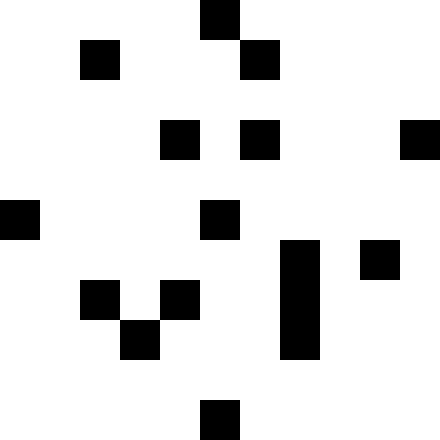


**a)** Copie el código utilizado en NetLogo implementando el juego de la vida de Conway y ejecutelo paso a paso habiendo inicializando el entorno de 11x11 con el patrón anterior.

**b)** Ilustre el patrón de la reticula en cada iteración hasta la numero 5.

**c)** Describa lo que ocurrió. ¿Sucedió algo en particular a lo largo de las iteraciones?.

### Punto A

El codigo fue tomado de la librería de modelos en:

**Sample Models/Computer Science/Cellular Automata**

In [ ]:
patches-own [
  living?         ;; indicates if the cell is living
  live-neighbors  ;; counts how many neighboring cells are alive
]

to setup-blank
  clear-all
  ask patches [ cell-death ]
  reset-ticks
end

to setup-random
  clear-all
  ask patches
    [ ifelse random-float 11.0 < initial-density
      [ cell-birth ]
      [ cell-death ] ]
  reset-ticks
end

to cell-birth
  set living? true
  set pcolor fgcolor
end

to cell-death
  set living? false
  set pcolor bgcolor
end

to go
  ask patches
    [ set live-neighbors count neighbors with [living?] ]
  ;; Starting a new "ask patches" here ensures that all the patches
  ;; finish executing the first ask before any of them start executing
  ;; the second ask.  This keeps all the patches in synch with each other,
  ;; so the births and deaths at each generation all happen in lockstep.
  ask patches
    [ ifelse live-neighbors = 3
      [ cell-birth ]
      [ if live-neighbors != 2
        [ cell-death ] ] ]
  tick
end

to draw-cells
  let erasing? [living?] of patch mouse-xcor mouse-ycor
  while [mouse-down?]
    [ ask patch mouse-xcor mouse-ycor
      [ ifelse erasing?
        [ cell-death ]
        [ cell-birth ] ]
      display ]
end


; Copyright 1998 Uri Wilensky.
; See Info tab for full copyright and license.

### Punto B

#### Posición antes de la interación
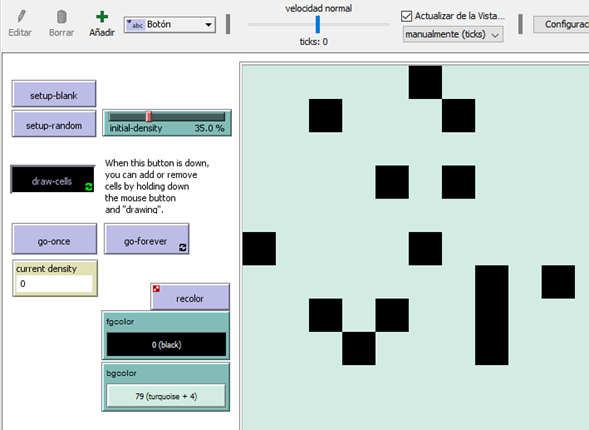

#### Iteración número 1:

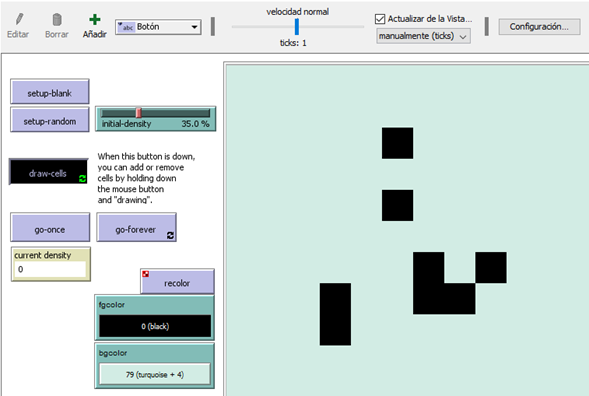

#### Iteración número 2

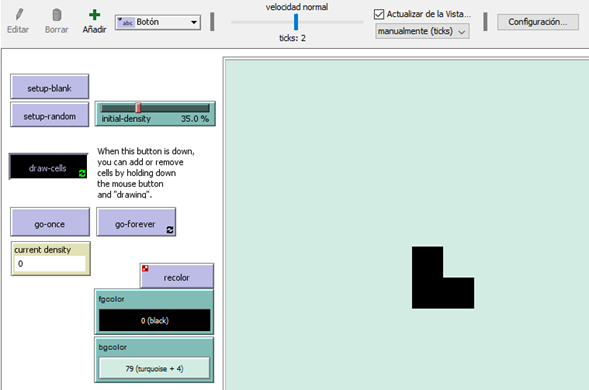

#### Iteración número 3

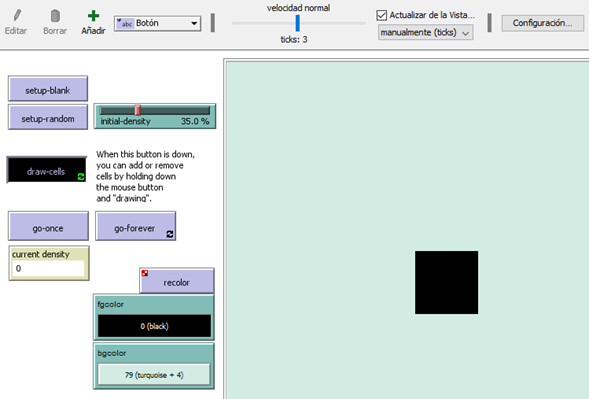

#### Iteración 3 - infinito, por lo que la 5 sería también:

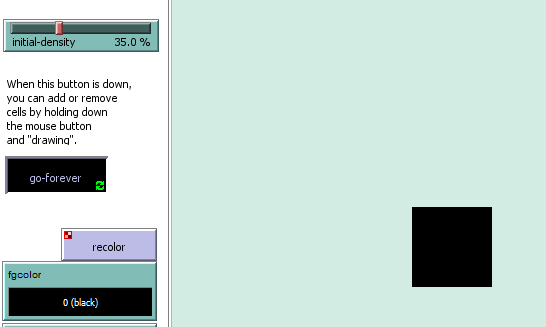

### Punto C

Se puede decir que realmente la figura final no dependía de muchas de las celulas que estaban lejos, dado que en cada iteración iban muriendo, que ocasionaba que quien era más llamativo en los cambios hasta el cuadrado, eran las celulas que estaban en la esquina inferior derecha.